In [6]:
import warnings
warnings.filterwarnings(action='ignore')

import time
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf

from tensorflow.keras.models import Sequential  
from tensorflow.keras.models import load_model  

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten  
from tensorflow.keras.layers import Dense       
from tensorflow.keras.layers import Dropout    
from tensorflow.keras.callbacks import EarlyStopping   
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras import regularizers 
from tensorflow.keras.utils import to_categorical   
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold  

import matplotlib.pyplot as plt
%matplotlib inline  

print(tf.__version__)

2.0.0


### Generate image data

In [7]:
width = 128
height = 128

# generate train data
train_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        './train',                   # train img folder 
        target_size=(width, height), # size of train data
        batch_size=1,                
        class_mode='categorical')    # muliple classification

# generate validation data
vali_datagen = ImageDataGenerator(rescale=1./255)
 
vali_generator = vali_datagen.flow_from_directory(
        './validation',
        target_size=(width, height),    
        batch_size=1,
        class_mode='categorical')

Found 383 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


### Create Model

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), padding='same',
                 input_shape = (width, height, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2))) 
# model.add(Dropout(0.25)) 

model.add(Flatten()) 
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25)) 

# 7 categories
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', 
                                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=2)

start = time.time()
hist = model.fit(
    train_generator,
    epochs = 50,
    validation_data = vali_generator, 
    callbacks=[early_stopping])
end = time.time()

print('Runtime: {0:.2f} sec'.format(end-start))

Train for 383 steps, validate for 70 steps
Epoch 1/50
383/383 [==============================] - 30s 80ms/step - loss: 2.0324 - accuracy: 0.2428 - val_loss: 1.8458 - val_accuracy: 0.2714
Epoch 2/50
383/383 [==============================] - 30s 78ms/step - loss: 1.4859 - accuracy: 0.4674 - val_loss: 1.5186 - val_accuracy: 0.4000
Epoch 3/50
383/383 [==============================] - 30s 78ms/step - loss: 0.7743 - accuracy: 0.7467 - val_loss: 1.6289 - val_accuracy: 0.5571
Epoch 4/50
383/383 [==============================] - 30s 77ms/step - loss: 0.4817 - accuracy: 0.8381 - val_loss: 1.2410 - val_accuracy: 0.6571
Epoch 5/50
383/383 [==============================] - 30s 78ms/step - loss: 0.3632 - accuracy: 0.8721 - val_loss: 1.1112 - val_accuracy: 0.6429
Epoch 6/50
383/383 [==============================] - 29s 77ms/step - loss: 0.2611 - accuracy: 0.8982 - val_loss: 1.3439 - val_accuracy: 0.5429
Epoch 7/50
383/383 [==============================] - 30s 77ms/step - loss: 0.2683 - accuracy

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4194336   
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                

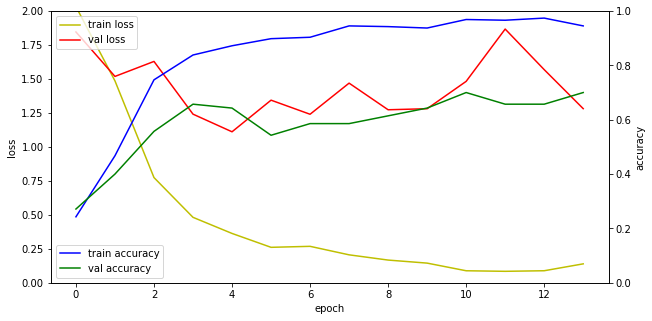

In [10]:
fig, loss_ax = plt.subplots()
fig.set_size_inches(10, 5) 

# set y-axis
acc_ax = loss_ax.twinx() 

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 2.0]) 

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

# set labels
loss_ax.set_xlabel('epoch')  
loss_ax.set_ylabel('loss')   
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left') 
acc_ax.legend(loc='lower left')  

plt.show()